# Dive into the Competition
>  Now that you know the basics of Kaggle competitions, you will learn how to study the specific problem at hand. You will practice EDA and get to establish correct local validation strategies. You will also learn about data leakage.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Winning a Kaggle Competition in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(10, 10)

## Understand the problem

### Understand the problem type

<div class=""><p>As you've just seen, the first step of the solution workflow is to skim through the problem statement. Your goal now is to determine data types available as well as the problem type for the Avito Demand Prediction Challenge. The evaluation metric in this competition is the Root Mean Squared Error. The problem definition is presented below.</p>
<p><code>In this Kaggle competition, Avito is challenging you to predict demand for an online advertisement based on its full description (price, title, images, etc.), its context (geo position, similar ads already posted) and historical demand for similar ads in the past.
</code></p>
<hr>
<p>What problem type are you facing, and what data do you have at your disposal?</p></div>

<pre>
Possible Answers
<b>This is a regression problem with tabular, time series, image and text data.</b>
This is a regression problem with tabular, text and image data.
This is a classification problem with tabular, time series, image and text data.
This is a clustering problem with tabular, text and image data.
</pre>

**This competition contains a mix of various structured and unstructured data.**

### Define a competition metric

<p>Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of different models on a local validation set.</p>

<p>For now, your goal is to manually develop a couple of competition metrics in case if they are not available in <code>sklearn.metrics</code>.</p>

<p>In particular, you will define:</p>

*   <p>Mean Squared Error (MSE) for the regression problem:<p>
$$ MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2 $$
*   Logarithmic Loss (LogLoss) for the binary classification problem:
$$ LogLoss = -\frac{1}{N} \sum_{i = 1}^N (y_i \ln p_i + (1 - y_i) \ln (1 - p_i)) $$



In [16]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/true_pred.npz

In [28]:
data = np.load('true_pred.npz')
y_classification_pred = data['y_classification_pred']
y_classification_true = data['y_classification_true']
y_regression_pred = data['y_regression_pred']
y_regression_true = data['y_regression_true']
data.close()

Instructions 1/2
<li>Using <code>numpy</code>, define MSE metric. As a function input, you're given true <code>y_true</code> and predicted <code>y_pred</code> arrays.</li>

In [32]:
# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
  	# Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_regression_true, y_regression_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(y_regression_true, y_regression_pred)))

Sklearn MSE: 0.15418. 
Your MSE: 0.15418. 


Instructions 2/2
<li>Using <code>numpy</code>, define LogLoss metric. As input, you're given true class <code>y_true</code> and probability predicted <code>prob_pred</code>.</li>

In [33]:
# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

Sklearn LogLoss: 1.10801
Your LogLoss: 1.10801


**You see that your functions work the same way that built-in sklearn metrics. Knowing the problem type and evaluation metric, it's time to start Data Analysis.**

## Initial EDA

### EDA statistics

<div class=""><p>As mentioned in the slides, you'll work with New York City taxi fare prediction data. You'll start with finding some basic statistics about the data. Then you'll move forward to plot some dependencies and generate hypotheses on them.</p>
<p>The <code>train</code> and <code>test</code> DataFrames are already available in your workspace.</p></div>

In [36]:
train = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/taxi_train.csv')
test = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/taxi_test.csv')

Instructions 1/2
<ul>
<li>Find the shapes of the train and test data.</li>
<li>Look at the head of the train data.</li>
</ul>

In [39]:
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head()
train.head()

Train shape: (20000, 8)
Test shape: (9914, 7)


,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Instructions 2/2
<ul>
<li>Describe the "fare_amount" column to get some statistics about the target variable.</li>
<li>Find the distribution of the "passenger_count" in the train data (using the <code>value_counts()</code> method).</li>
</ul>

In [40]:
# Describe the target variable
print(train.fare_amount.describe())

# Train distribution of passengers within rides
print(train.passenger_count.value_counts())

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


**You just obtained a couple of descriptive statistics about the data. You can look at them to understand the data structure. However, they are not informative enough to get ideas for the future solution.**

### EDA plots I

<div class=""><p>After generating a couple of basic statistics, it's time to come up with and validate some ideas about the data dependencies. Again, the <code>train</code> DataFrame from the taxi competition is already available in your workspace.</p>
<p>To begin with, let's make a scatterplot plotting the relationship between the fare amount and the distance of the ride. Intuitively, the longer the ride, the higher its price.</p>
<p>To get the distance in kilometers between two geo-coordinates, you will use Haversine distance. Its calculation is available with the <code>haversine_distance()</code> function defined for you. The function expects <code>train</code> DataFrame as input.</p></div>

In [41]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

Instructions
<ul>
<li>Create a new variable "distance_km" as Haversine distance between pickup and dropoff points.</li>
<li>Plot a scatterplot with "fare_amount" on the x axis and "distance_km" on the y axis. To draw a scatterplot use matplotlib <code>scatter()</code> method.</li>
<li>Set a limit on a ride distance to be between 0 and 50 kilometers to avoid plotting outliers.</li>
</ul>

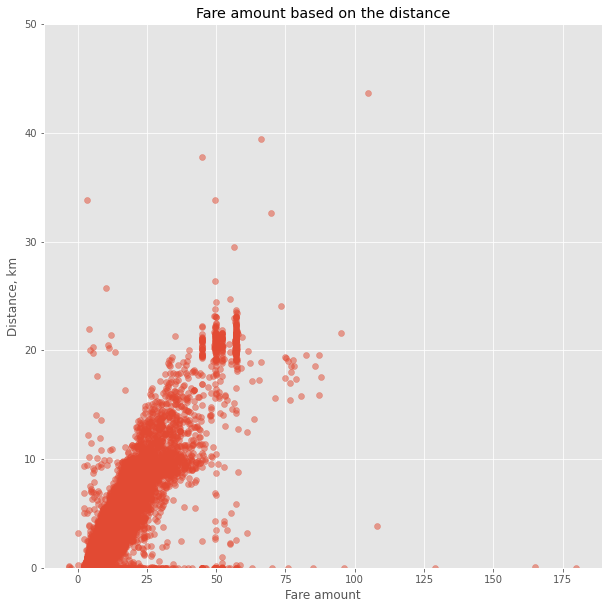

In [44]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

**It's obvious now that there is a clear dependency between ride distance and fare amount. So, ride distance is, probably, a good feature.**

### EDA plots II

<div class=""><p>Another idea that comes to mind is that the price of a ride could change during the day.</p>
<p>Your goal is to plot the median fare amount for each hour of the day as a simple line plot. The hour feature is calculated for you. Don't worry if you do not know how to work with the date features. We will explore them in the chapter on Feature Engineering.</p></div>

Instructions
<ul>
<li>Group <code>train</code> DataFrame by <code>"hour"</code> and calculate the median for the <code>"fare_amount"</code> column.</li>
<li>Using <code>hour_price</code> DataFrame obtained, plot a line with <code>"hour"</code> on the x axis and <code>"fare_amount"</code> on the y axis.</li>
</ul>

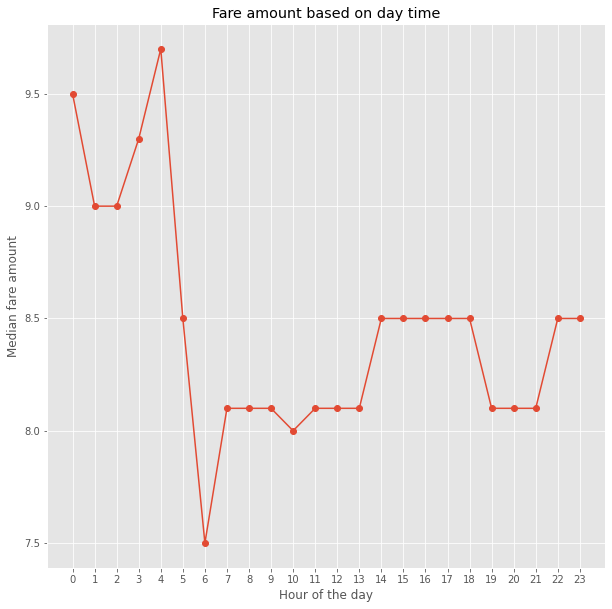

In [45]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

**We see that prices are a bit higher during the night. It is a good indicator that we should include the "hour" feature in the final model, or at least add a binary feature "is_night". Move on to the next lesson to learn how to check whether new features are useful for the model or not!**

## Local validation

### K-fold cross-validation

<div class=""><p>You will start by getting hands-on experience in the most commonly used K-fold cross-validation.</p>
<p>The data you'll be working with is from the "Two sigma connect: rental listing inquiries" Kaggle competition. The competition problem is a multi-class classification of the rental listings into 3 classes: low interest, medium interest and high interest. For faster performance, you will work with a subsample consisting of 1,000 observations.</p>
<p>You need to implement a K-fold validation strategy and look at the sizes of each fold obtained. <code>train</code> DataFrame is already available in your workspace.</p></div>

In [48]:
train = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/renthop_train_1k.csv')

Instructions
<ul>
<li>Create a <code>KFold</code> object with 3 folds.</li>
<li>Loop over each split using the <code>kf</code> object.</li>
<li>For each split select training and testing folds using <code>train_index</code> and <code>test_index</code>.</li>
</ul>

In [49]:
# Import KFold
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 9)
Medium interest listings in CV train: 175

Fold: 1
CV train shape: (667, 9)
Medium interest listings in CV train: 165

Fold: 2
CV train shape: (667, 9)
Medium interest listings in CV train: 162



**So, we see that the number of observations in each fold is almost uniform. It means that we've just splitted the train data into 3 equal folds. However, if we look at the number of medium-interest listings, it's varying from 162 to 175 from one fold to another. To make them uniform among the folds, let's use Stratified K-fold!**

### Stratified K-fold

<div class=""><p>As you've just noticed, you have a pretty different target variable distribution among the folds due to the random splits. It's not crucial for this particular competition, but could be an issue for the classification competitions with the highly imbalanced target variable.</p>
<p>To overcome this, let's implement the stratified K-fold strategy with the stratification on the target variable. <code>train</code> DataFrame is already available in your workspace.</p></div>

Instructions
<ul>
<li>Create a <code>StratifiedKFold</code> object with 3 folds and shuffling.</li>
<li>Loop over each split using <code>str_kf</code> object. Stratification is based on the "interest_level" column.</li>
<li>For each split select training and testing folds using <code>train_index</code> and <code>test_index</code>.</li>
</ul>

In [50]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train, train['interest_level']):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 9)
Medium interest listings in CV train: 167

Fold: 1
CV train shape: (667, 9)
Medium interest listings in CV train: 167

Fold: 2
CV train shape: (667, 9)
Medium interest listings in CV train: 168



**Now you see that both size and target distribution are the same among the folds. The general rule is to prefer Stratified K-Fold over usual K-Fold in any classification problem.**

## Validation usage

### Time K-fold

<div class=""><p>Remember the "Store Item Demand Forecasting Challenge" where you are given store-item sales data, and have to predict future sales?</p>
<p>It's a competition with time series data. So, time K-fold cross-validation should be applied. Your goal is to create this cross-validation strategy and make sure that it works as expected.</p>
<p>Note that the <code>train</code> DataFrame is already available in your workspace, and that <code>TimeSeriesSplit</code> has been imported from <code>sklearn.model_selection</code>.</p></div>

In [54]:
from sklearn.model_selection import TimeSeriesSplit
train = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/23-winning-a-kaggle-competition-in-python/datasets/demand_forecasting_train_1_month.csv')

Instructions
<ul>
<li>Create a <code>TimeSeriesSplit</code> object with 3 splits.</li>
<li>Sort the train data by "date" column to apply time K-fold.</li>
<li>Loop over each time split using <code>time_kfold</code> object.</li>
<li>For each split select training and testing folds using <code>train_index</code> and <code>test_index</code>.</li>
</ul>

In [55]:
# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



**You've applied time K-fold cross-validation strategy for the demand forecasting. Look at the output. It works as expected, training only on the past data and predicting the future.**

### Overall validation score

<div class=""><p>Now it's time to get the actual model performance using cross-validation! How does our store item demand prediction model perform?</p>
<p>Your task is to take the Mean Squared Error (MSE) for each fold separately, and then combine these results into a single number.</p>
<p>For simplicity, you're given <code>get_fold_mse()</code> function that for each cross-validation split fits a Random Forest model and returns a list of MSE scores by fold. <code>get_fold_mse()</code> accepts two arguments: <code>train</code> and <code>TimeSeriesSplit</code> object.</p></div>

In [56]:
from sklearn.ensemble import RandomForestRegressor
def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores

Instructions 1/3
<ul>
<li>Create <strong>time</strong> 3-fold cross-validation.</li>
<li>Print the <code>numpy</code> mean of MSE scores by folds.</li>
</ul>

In [57]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Sort train data by date
train = train.sort_values('date')

# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))

Mean validation MSE: 955.49186


Instructions 2/3
<li>Print the list of MSEs by fold.</li>

In [58]:
print('MSE by fold: {}'.format(mse_scores))

MSE by fold: [890.30336, 961.65797, 1014.51424]


Instructions 3/3
<li>To calculate the overall score, find the sum of MSE mean and standard deviation.</li>

In [59]:
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Overall validation MSE: 1006.38784


**Now, you know different validation strategies as well as how to use them to obtain overall model performance. It's time for the next and the most interesting part of the solution process: Feature Engineering and Modeling.**